## Train Agent on Osu Environment using PPO LSTM

In [1]:
from environment import OsuEnvironment
from ppo_agent import PPO_Agent
from model import LSTM_Actor, LSTM_Critic
import torch
import torch.nn as nn
import torch.optim as optim
import os
import warnings
import logging

if not os.path.exists('yolov5'):
    !git clone https://github.com/ultralytics/yolov5
    !pip install -r yolov5/requirements.txt

warnings.simplefilter("ignore", FutureWarning)
logging.getLogger('ultralytics').setLevel(logging.ERROR)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
# define arguments for Agent
env = OsuEnvironment(num_frame=30)
behavior_cloning = True
hidden_size = 128
num_layer = 4
dropout = 0.1
batch_size = 64
n_epoch = 5

actor_net = LSTM_Actor(env.observation_space, env.action_space.nvec, hidden_size=hidden_size, num_layer=num_layer, dropout=dropout).to(device)
critic_net = LSTM_Critic(env.observation_space, hidden_size=hidden_size, num_layer=num_layer, dropout=dropout).to(device)

actor_optimizer = optim.Adam(actor_net.parameters(), lr=0.001)
critic_optimizer = optim.Adam(critic_net.parameters(), lr=0.001)

agent = PPO_Agent(env=env, 
                  actor_net=actor_net, 
                  critic_net=critic_net,
                  actor_optimizer=actor_optimizer, 
                  critic_optimizer=critic_optimizer, 
                  batch_size=batch_size,
                  n_epoch=n_epoch, 
                  behavior_cloning=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\bohui/.cache\torch\hub\master.zip
YOLOv5  2024-12-2 Python-3.11.5 torch-2.5.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


Listening on 127.0.0.1:5555


In [3]:
agent.pretrain(total_episode=200)

Episod 10, pre-training loss: 0.15750561209658012
Episod 20, pre-training loss: 0.12310200077838315
Episod 30, pre-training loss: 0.04360068267904115
Episod 40, pre-training loss: 0.025893464914932194
Episod 50, pre-training loss: 0.01855383990384096
Episod 60, pre-training loss: 0.015083551638222585
Episod 70, pre-training loss: 0.012421049915256747
Episod 80, pre-training loss: 0.01068172699855576
Episod 90, pre-training loss: 0.008912463475838356
Episod 100, pre-training loss: 0.008599290084968292
Episod 110, pre-training loss: 0.008169023983499779
Episod 120, pre-training loss: 0.00889511815180665
Episod 130, pre-training loss: 0.006354420058529835
Episod 140, pre-training loss: 0.007386515232065532
Episod 150, pre-training loss: 0.005963025220588372
Episod 160, pre-training loss: 0.005750644308238204
Episod 170, pre-training loss: 0.006398534328386107
Episod 180, pre-training loss: 0.005332971834036227
Episod 190, pre-training loss: 0.005849524642841339
Episod 200, pre-training lo

In [4]:
agent.eval(pretrain=True)

Accuracy:  0.991227307000754


In [10]:
agent.train(total_episode=700, c=0.02, expert_weight=0.2, margin=0.8)

Episode 10: Total Reward: -119, Loss: 0.17934998609125613
Timeout
Episode 20: Total Reward: 0, Loss: 0.09820421166331642
Episode 30: Total Reward: -231, Loss: 0.13732755888146136
Timeout
Timeout
Episode 40: Total Reward: -94, Loss: 0.18736846651881933
Episode 50: Total Reward: -209, Loss: 0.12541899087715147
Episode 60: Total Reward: -76, Loss: 0.23749476224184035
Timeout
Timeout
Episode 70: Total Reward: -547, Loss: 0.10273795059069357
Episode 80: Total Reward: -167, Loss: 0.1267778403358534
Episode 90: Total Reward: -130, Loss: 0.14661112427711487
Episode 100: Total Reward: -211, Loss: 0.12974074177036526
Episode 110: Total Reward: -97, Loss: 0.1779847379773855
Episode 120: Total Reward: -691, Loss: 0.10139400204270914
Timeout
Episode 130: Total Reward: -89, Loss: 0.1899035781621933
Episode 140: Total Reward: -450, Loss: 0.10188047023384214
Timeout
Episode 150: Total Reward: -253, Loss: 0.11523597608885347
Timeout
Episode 160: Total Reward: -150, Loss: 0.18385726045817136
Episode 170

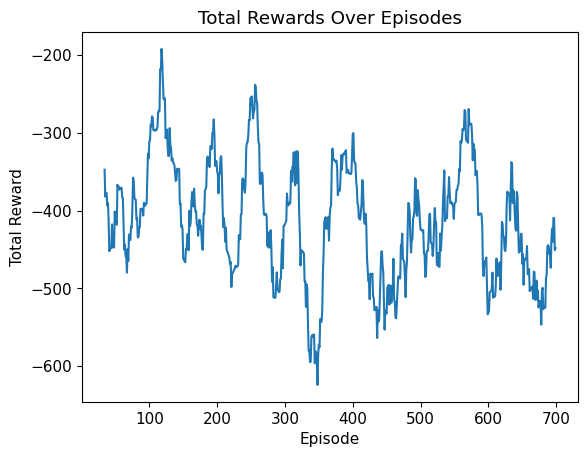

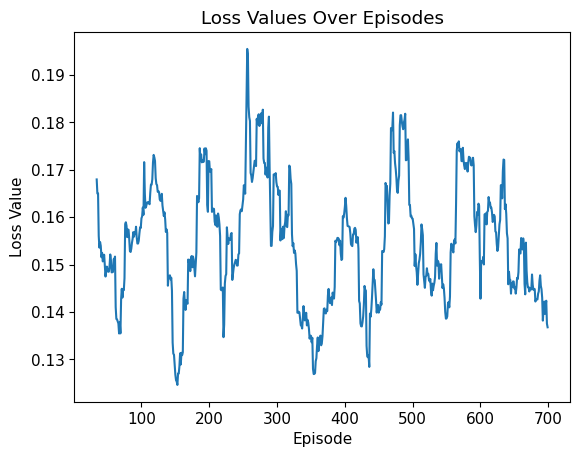

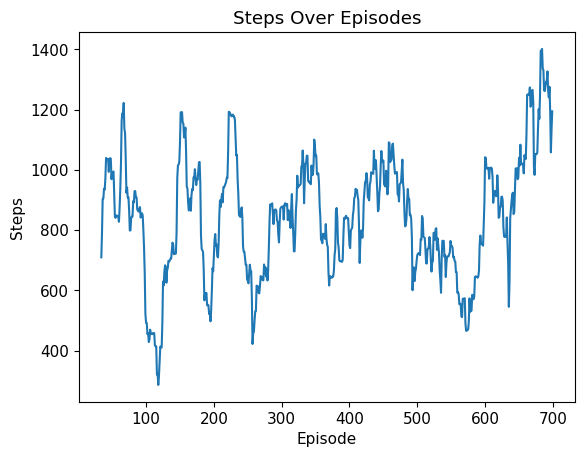

In [11]:
%matplotlib inline
agent.plot()

Timeout
Timeout
Timeout
Timeout


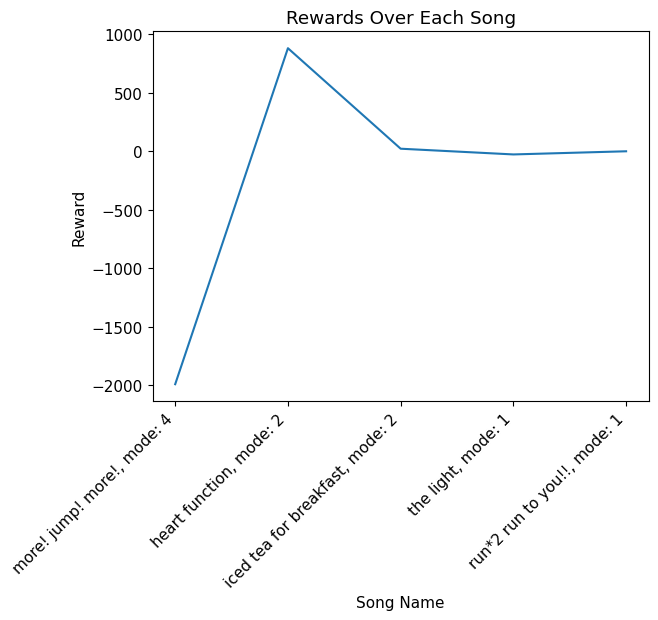

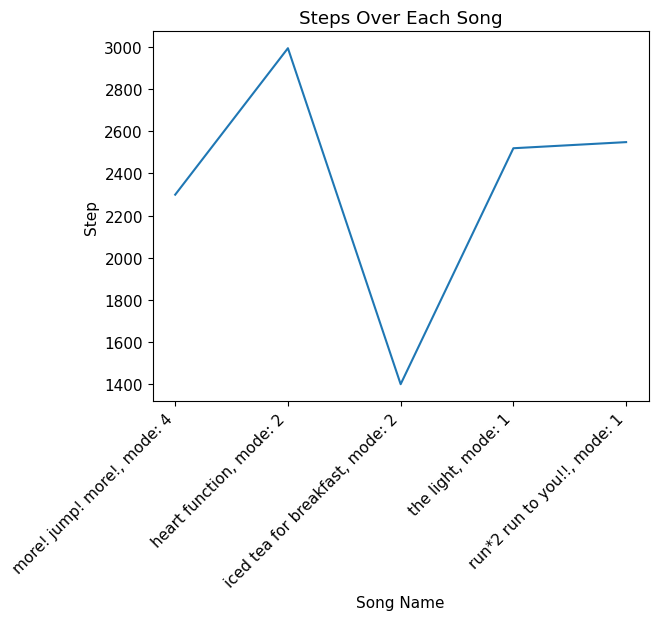

In [13]:
%matplotlib inline
agent.eval(total_episode=5)